# First Name:
# Last Name:

# Import Libraries  

In [11]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [4]:

# Load the dataset with explicit encoding
data = pd.read_csv('bottle.csv', encoding='latin1', low_memory=False)


# Data management 

In [5]:

# Select the relevant columns
selected_data = data[['T_qual', 'T_degC']].dropna()  # Remove rows with missing values


# Box Plot

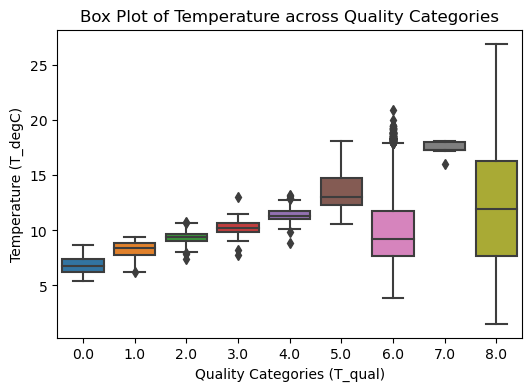

In [24]:

# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='T_qual', y='T_degC', data=selected_data)
plt.title('Box Plot of Temperature across Quality Categories')
plt.xlabel('Quality Categories (T_qual)')
plt.ylabel('Temperature (T_degC)')

plt.draw()

plt.savefig('box_plot.png')


# ANOVA

In [13]:

# Perform ANOVA
anova_result = f_oneway(*[group['T_degC'] for name, group in selected_data.groupby('T_qual')])

# Calculate mean and standard deviation for each category
mean_values = selected_data.groupby('T_qual')['T_degC'].mean()
std_values = selected_data.groupby('T_qual')['T_degC'].std()

# Print the ANOVA result, mean values, and std values
print("ANOVA Result:")
print("F-statistic:", anova_result.statistic)
print("Prob(F-statistic):", anova_result.pvalue)
print("\nMean values:")
print(mean_values)
print("\nSTD values:")
print(std_values)

ANOVA Result:
F-statistic: 93.4222200009212
Prob(F-statistic): 1.1499626994142666e-151

Mean values:
T_qual
0.0     6.811818
1.0     8.247703
2.0     9.312022
3.0    10.206317
4.0    11.401623
5.0    13.576240
6.0     9.925842
7.0    17.408857
8.0    12.381496
Name: T_degC, dtype: float64

STD values:
T_qual
0.0    0.762674
1.0    0.711415
2.0    0.580184
3.0    0.673224
4.0    0.873658
5.0    1.726851
6.0    3.108433
7.0    0.729064
8.0    5.696665
Name: T_degC, dtype: float64
